<h1>Case study 1 Apply Machine learning algorithm on Customer Churn from Kaggle Data Repository. </h1>

In [374]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import *
import seaborn as sns

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.max_rows',None)

In [121]:
df=pd.read_csv("churn.csv")

In [33]:
df.head()

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [34]:
df.describe(include='all')

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
count,36992.000000,36992.000000,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992.000000,36992.000000,36992.000000,36992,33549.000000,36992,36992,36992,36992,36992,36992.000000
unique,NaN,NaN,3,36992,3,6,1096,3,11359,3,4,3,30101,NaN,NaN,NaN,1654,NaN,2,2,2,5,9,NaN
top,NaN,NaN,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,NaN,NaN,NaN,Error,NaN,Yes,Yes,No,Not Applicable,Poor Product Quality,NaN
freq,NaN,NaN,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,NaN,NaN,NaN,3522,NaN,20342,20440,18602,18602,6350,NaN
mean,18495.500000,37.118161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.915576,243.472334,29271.194003,NaN,686.882199,NaN,NaN,NaN,NaN,NaN,0.540982
std,10678.814916,15.867412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.819900,398.289149,19444.806226,NaN,194.063624,NaN,NaN,NaN,NaN,NaN,0.498324
min,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-999.000000,-2814.109110,800.460000,NaN,-760.661236,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9247.750000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,60.102500,14177.540000,NaN,616.150000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,18495.500000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,161.765000,27554.485000,NaN,697.620000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,27743.250000,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,356.515000,40855.110000,NaN,763.950000,NaN,NaN,NaN,NaN,NaN,1.000000


#assumptions
average age of a customers are 37,
Mostly are Females,
Belong to town,
Most of the people have basic membership,
Most people access from desktop,
most reason of churn : poor product quality

<AxesSubplot:>

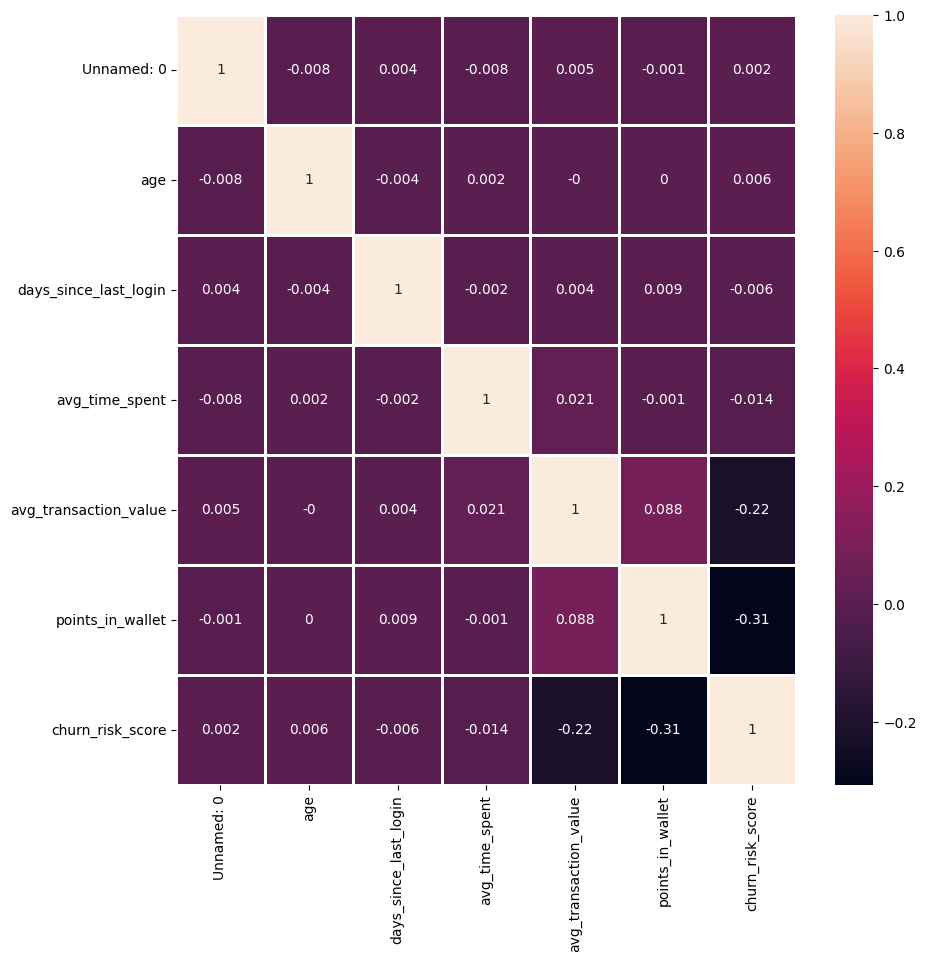

In [35]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(np.round(df.corr(),3),annot=True,linewidths=.9)

In [ ]:
#removing unneccessary columns : unnamed, security no, joining date , referral id

In [122]:
df.drop(columns=["Unnamed: 0","security_no","joining_date","referral_id"],inplace=True)

# Data Preprocessing

### 1. handling missing values

In [123]:
df.isna().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joined_through_referral            0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [124]:
df.region_category.unique()

array(['Village', 'City', 'Town', nan], dtype=object)

In [125]:
df['region_category'].mode().iloc[0]

'Town'

In [126]:
df.region_category.value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [127]:
df[df.region_category.isna() & df.churn_risk_score==1] #null values which have 1 as churn score

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
7,42,M,NaN,No Membership,?,Credit/Debit Card Offers,Both,Fiber_Optic,07:52:43,19,429.110000,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1
37,26,M,NaN,No Membership,Yes,Without Offers,Desktop,Wi-Fi,14:55:59,3,215.890000,41979.65,9.0,NaN,No,Yes,No,Not Applicable,Too many ads,1
61,44,F,NaN,No Membership,Yes,Without Offers,Both,Wi-Fi,22:22:17,13,283.490000,7603.71,Error,553.45,Yes,Yes,Yes,Unsolved,No reason specified,1
64,10,M,NaN,Basic Membership,No,Credit/Debit Card Offers,Smartphone,Fiber_Optic,11:07:18,12,31.670000,25436.23,Error,656.67,No,Yes,No,Not Applicable,Poor Website,1
83,54,M,NaN,Basic Membership,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,19:26:54,13,254.720000,11345.66,7.0,572.41,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36937,10,M,NaN,No Membership,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,08:11:14,22,31.230000,4597.48,13.0,NaN,No,Yes,Yes,Solved,Too many ads,1
36943,16,M,NaN,No Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,11:46:34,9,53.150000,15133.64,13.0,662.17,No,Yes,No,Not Applicable,Poor Product Quality,1
36978,57,M,NaN,Silver Membership,Yes,Without Offers,?,Wi-Fi,19:15:17,13,58.410000,40795.52,14.0,605.82,No,Yes,No,Not Applicable,Too many ads,1
36987,46,F,NaN,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,2,-650.682759,27277.68,6.0,639.51,No,Yes,Yes,No Information Available,No reason specified,1


In [57]:
df.region_category.isna().sum()

5428

In [58]:
5428-2979

2449

In [164]:
df.region_category.fillna(df['region_category'].mode().iloc[0],inplace=True)#replacing nan value with mode

In [ ]:
#with preffered offer types

In [65]:
df.preferred_offer_types.unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [90]:
df.shape

(36992, 22)

In [92]:
df.pivot_table(index="preferred_offer_types",aggfunc='count') #checking the relation of offer with other features

,age,avg_frequency_login_days,avg_time_spent,avg_transaction_value,churn_risk_score,complaint_status,days_since_last_login,feedback,gender,internet_option,joined_through_referral,joining_date,last_visit_time,medium_of_operation,membership_category,offer_application_preference,past_complaint,points_in_wallet,referral_id,region_category,used_special_discount
preferred_offer_types,,,,,,,,,,,,,,,,,,,,,
Credit/Debit Card Offers,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,12274,11145,12274,10476,12274
Gift Vouchers/Coupons,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349,11212,12349,10538,12349
Without Offers,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,12081,10931,12081,10311,12081


In [103]:
df.pivot_table(index=["churn_risk_score","preferred_offer_types"],aggfunc='count') #relation of churn with offer to other features

age  avg_frequency_login_days  \
churn_risk_score preferred_offer_types                                      
0                Credit/Debit Card Offers  5666                      5666   
                 Gift Vouchers/Coupons     5980                      5980   
                 Without Offers            5203                      5203   
1                Credit/Debit Card Offers  6608                      6608   
                 Gift Vouchers/Coupons     6369                      6369   
                 Without Offers            6878                      6878   

                                           avg_time_spent  \
churn_risk_score preferred_offer_types                      
0                Credit/Debit Card Offers            5666   
                 Gift Vouchers/Coupons               5980   
                 Without Offers                      5203   
1                Credit/Debit Card Offers            6608   
                 Gift Vouchers/Coupons               6369   
                 Without Offers                      6878   

                                           avg_transaction_value  \
churn_risk_score preferred_offer_types                             
0                Credit/Debit Card Offers                   5666   
                 Gift Vouchers/Coupons                      5980   
                 Without Offers                             5203   
1                Credit/Debit Card Offers                   6608   
                 Gift Vouchers/Coupons                      6369   
                 Without Offers                             6878   

                                           complaint_status  \
churn_risk_score preferred_offer_types                        
0                Credit/Debit Card Offers              5666   
                 Gift Vouchers/Coupons                 5980   
                 Without Offers                        5203   
1                Credit/Debit Card Offers              6608   
                 Gift Vouchers/Coupons                 6369   
                 Without Offers                        6878   

                                           days_since_last_login  feedback  \
churn_risk_score preferred_offer_types                                       
0                Credit/Debit Card Offers                   5666      5666   
                 Gift Vouchers/Coupons                      5980      5980   
                 Without Offers                             5203      5203   
1                Credit/Debit Card Offers                   6608      6608   
                 Gift Vouchers/Coupons                      6369      6369   
                 Without Offers                             6878      6878   

                                           gender  internet_option  \
churn_risk_score preferred_offer_types                               
0                Credit/Debit Card Offers    5666             5666   
                 Gift Vouchers/Coupons       5980             5980   
                 Without Offers              5203             5203   
1                Credit/Debit Card Offers    6608             6608   
                 Gift Vouchers/Coupons       6369             6369   
                 Without Offers              6878             6878   

                                           joined_through_referral  \
churn_risk_score preferred_offer_types                               
0                Credit/Debit Card Offers                     5666   
                 Gift Vouchers/Coupons                        5980   
                 Without Offers                               5203   
1                Credit/Debit Card Offers                     6608   
                 Gift Vouchers/Coupons                        6369   
                 Without Offers                               6878   

                                           joining_date  last_visit_time  \
churn_risk_score preferred_offer_types                           

In [129]:
df.preferred_offer_types.mode().iloc[0]

'Gift Vouchers/Coupons'

In [130]:
df.preferred_offer_types.value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [131]:
df.preferred_offer_types.fillna(df.preferred_offer_types.mode().iloc[0],inplace=True)

In [132]:
df.preferred_offer_types.isna().sum()

0

In [133]:
#now handling values of points in wallet

In [135]:
df.points_in_wallet.value_counts()

705.070000     9
780.920000     8
771.750000     7
760.540000     7
710.690000     7
              ..
1188.729586    1
827.500000     1
357.996152     1
392.010095     1
197.264414     1
Name: points_in_wallet, Length: 23699, dtype: int64

<AxesSubplot:>

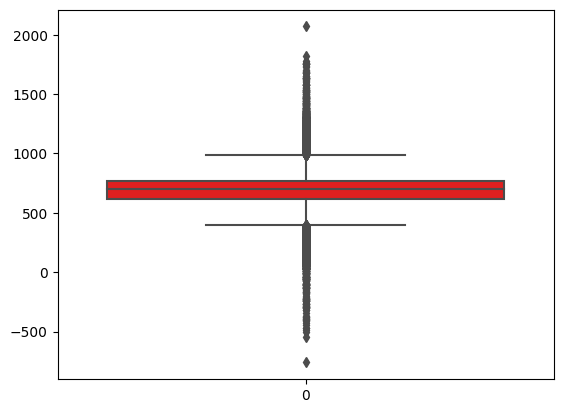

In [142]:
sns.boxplot(data=df["points_in_wallet"],color="red")

In [143]:
df.points_in_wallet.median()

697.62

In [145]:
df.points_in_wallet.fillna(df.points_in_wallet.median(),inplace=True)

In [146]:
df.points_in_wallet.isna().sum()

0

In [148]:
#now handling some incorrect or noisy data

In [149]:
df.joined_through_referral.unique() #? replae with mode 

array(['No', '?', 'Yes'], dtype=object)

In [151]:
df.joined_through_referral.value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [152]:
df.joined_through_referral.mode().iloc[0] 

'No'

In [153]:
#first replace with nan
df["joined_through_referral"]=df["joined_through_referral"].replace('?',np.nan)

In [154]:
df.joined_through_referral.value_counts() 
#nan values doesn't show here ,now we can replace nan values  with mode

No     15839
Yes    15715
Name: joined_through_referral, dtype: int64

In [155]:
df["joined_through_referral"].fillna(df.joined_through_referral.mode().iloc[0],inplace=True)

In [156]:
df.joined_through_referral.isna().sum()

0

In [157]:
#checking all categorical features
df.select_dtypes(include="object")

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6.0,No,Yes,Yes,Unsolved,Poor Website
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16.0,No,Yes,Yes,Solved,Poor Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,F,NaN,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,6.0,No,Yes,Yes,No Information Available,No reason specified
36988,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,23:18:31,28.0,Yes,No,No,Not Applicable,Poor Customer Service
36989,F,NaN,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,Error,No,Yes,Yes,Unsolved,Poor Website
36990,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,20.0,Yes,Yes,No,Not Applicable,No reason specified


In [158]:
df.gender.unique()

array(['F', 'M', 'Unknown'], dtype=object)

In [159]:
df.gender.value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [160]:
df.gender.mode().iloc[0]

'F'

In [161]:
#first replace with nan
df["gender"]=df["gender"].replace('Unknown',np.nan)
df["gender"].fillna(df.gender.mode().iloc[0],inplace=True)

In [167]:
df.medium_of_operation.unique()

array(['?', 'Desktop', 'Smartphone', 'Both'], dtype=object)

In [169]:
#first replace with nan
df["medium_of_operation"]=df["medium_of_operation"].replace('?',np.nan)
#replacing Error keyword with nan 
df["medium_of_operation"].fillna(df.medium_of_operation.mode().iloc[0],inplace=True)
#replacing nan with mode

In [173]:
df.avg_frequency_login_days.unique() #it's a numeric data

array(['17.0', '10.0', '22.0', ..., '-9.32551114210603',
       '-8.759329712785977', '27.8399274405269'], dtype=object)

In [183]:
df["avg_frequency_login_days"]=df["avg_frequency_login_days"].replace('Error',np.nan)
#replacing Error keyword with nan

In [184]:
df["avg_frequency_login_days"]=df["avg_frequency_login_days"].astype('float64')
#Converting from object dtype to float

<AxesSubplot:>

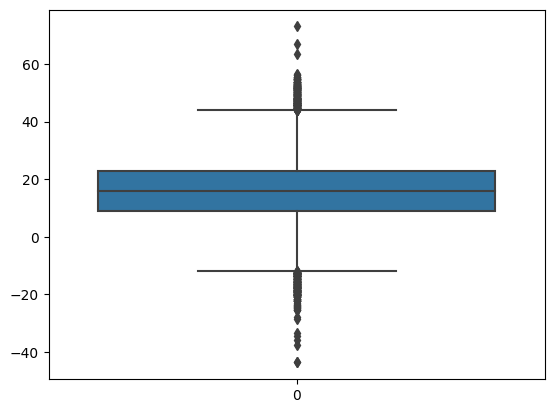

In [186]:
sns.boxplot(data=df["avg_frequency_login_days"])

In [190]:
df.avg_frequency_login_days.median()

16.0

In [ ]:
#now here negative values too 

In [231]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)
#converting 0 or less than values as a nan 

In [233]:
df.avg_frequency_login_days.fillna(df.avg_frequency_login_days.median(),inplace=True)

In [203]:
#now look for noisy or inccorrect data in numeric data

In [205]:
df.select_dtypes(include=np.number)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
0,18,17,300.630000,53005.25,17.0,781.750000,0
1,32,16,306.340000,12838.38,10.0,697.620000,0
2,44,14,516.160000,21027.00,22.0,500.690000,1
3,37,11,53.270000,25239.56,6.0,567.660000,1
4,31,20,113.130000,24483.66,16.0,663.060000,1
...,...,...,...,...,...,...,...
36987,46,2,-650.682759,27277.68,6.0,639.510000,1
36988,29,13,-638.123421,11069.71,28.0,527.990000,1
36989,23,12,154.940000,38127.56,16.0,680.470000,1
36990,53,15,482.610000,2378.86,20.0,197.264414,0


In [207]:
df.days_since_last_login.unique()

array([  17,   16,   14,   11,   20,   23,   10,   19,   15,   13, -999,
          5,   12,    9,   21,   18,    1,   22,    4,    8,    3,    6,
          2,   24,    7,   26,   25], dtype=int64)

In [220]:
df["days_since_last_login"]=df["days_since_last_login"].replace(-999,np.nan)
#replacing -999 with nan

In [225]:
df.days_since_last_login.fillna(df.days_since_last_login.median(),inplace=True)

In [226]:
df.avg_time_spent.unique()

array([ 300.63     ,  306.34     ,  516.16     , ..., -638.1234208,
        154.94     ,  482.61     ])

In [228]:
df['avg_time_spent']=df['avg_time_spent'].apply(lambda x:x if x>=0 else np.nan)

In [229]:
df.avg_time_spent.isna().sum()

1719

In [234]:
df.avg_time_spent.fillna(df.avg_time_spent.median(),inplace=True)

In [235]:
df.avg_transaction_value.unique()

array([53005.25, 12838.38, 21027.  , ..., 38127.56,  2378.86,  2189.68])

In [237]:
df.points_in_wallet.unique()

array([781.75      , 697.62      , 500.69      , ..., 242.97962545,
       639.51      , 197.26441364])

In [240]:
df[df.points_in_wallet<=0] #here too negative values

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
67,28,M,Village,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:46:58,4.0,457.33,20883.28,14.0,-549.357498,No,Yes,No,Not Applicable,Too many ads,1
70,59,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,10:53:03,13.0,207.52,12556.28,10.0,-44.597633,No,Yes,No,Not Applicable,No reason specified,1
213,42,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,00:30:47,8.0,179.84,39667.91,10.0,-38.084314,No,Yes,No,Not Applicable,Poor Product Quality,0
340,38,F,Town,Basic Membership,No,Without Offers,Desktop,Fiber_Optic,13:24:41,6.0,176.66,29048.04,21.0,-288.247333,Yes,No,Yes,No Information Available,Poor Product Quality,1
625,40,F,City,Premium Membership,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,23:59:55,13.0,104.47,87823.92,16.0,-301.998780,Yes,No,No,Not Applicable,Reasonable Price,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35411,13,M,City,Silver Membership,No,Without Offers,Desktop,Wi-Fi,05:14:17,21.0,32.85,30273.31,7.0,-108.057352,No,Yes,Yes,Solved in Follow-up,Too many ads,0
35883,63,M,Town,Basic Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,16:01:03,13.0,158.85,46377.80,25.0,-99.476870,Yes,No,Yes,No Information Available,Too many ads,1
35943,27,F,Town,Platinum Membership,No,Without Offers,Desktop,Wi-Fi,05:36:34,16.0,169.58,28162.81,12.0,-43.109270,Yes,No,No,Not Applicable,No reason specified,0
36414,43,M,Town,Platinum Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,17:38:05,5.0,40.54,868.01,16.0,-170.497210,Yes,No,No,Not Applicable,No reason specified,0


In [241]:
df['points_in_wallet']=df['points_in_wallet'].apply(lambda x:x if x>=0 else np.nan)

In [242]:
df.points_in_wallet.fillna(df.points_in_wallet.median(),inplace=True)

## Now Dealing with Outliers

In [245]:
#outliers : avg_transaction_value, avg_frequency_login_days, points_in_wallet,avg_time_spent 

In [263]:
Q1 = df.quantile(0.25)  #25%
Q3 = df.quantile(0.75) #75%
IQR = Q3 - Q1        #50%

In [265]:
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 
df_iqr.reset_index(inplace=True)

df_iqr.drop('index',axis=1, inplace=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [266]:
df_iqr

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,697.62,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,27,M,Town,Platinum Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,05:29:19,13.0,135.83,8225.68,16.0,748.57,Yes,No,No,Not Applicable,No reason specified,0
28224,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,2.0,174.18,27277.68,6.0,639.51,No,Yes,Yes,No Information Available,No reason specified,1
28225,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,23:18:31,13.0,174.18,11069.71,28.0,527.99,Yes,No,No,Not Applicable,Poor Customer Service,1
28226,23,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12.0,154.94,38127.56,16.0,680.47,No,Yes,Yes,Unsolved,Poor Website,1


<AxesSubplot:>

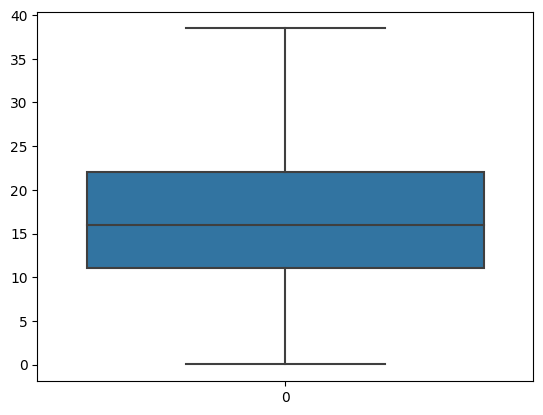

In [267]:
sns.boxplot(data=df_iqr["avg_frequency_login_days"])

# Feature scaling on numeric data

In [271]:
scale=df_iqr[['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']]
scale #selecting numeric data

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,18,17.0,300.63,53005.25,17.0,781.75
1,32,16.0,306.34,12838.38,10.0,697.62
2,44,14.0,516.16,21027.00,22.0,500.69
3,37,11.0,53.27,25239.56,6.0,567.66
4,31,20.0,113.13,24483.66,16.0,663.06
...,...,...,...,...,...,...
28223,27,13.0,135.83,8225.68,16.0,748.57
28224,46,2.0,174.18,27277.68,6.0,639.51
28225,29,13.0,174.18,11069.71,28.0,527.99
28226,23,12.0,154.94,38127.56,16.0,680.47


In [272]:
#standard scale
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
scaled_features=std.fit_transform(scale)
df_scaled=pd.DataFrame(scaled_features,columns=scale.columns)

In [273]:
df_scaled

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,-1.209868,0.757148,0.563506,1.567800,0.107030,1.151763
1,-0.326062,0.572566,0.596915,-0.883226,-0.870634,0.136977
2,0.431486,0.203401,1.824560,-0.383548,0.805362,-2.238414
3,-0.010417,-0.350345,-0.883783,-0.126493,-1.429299,-1.430614
4,-0.389191,1.310895,-0.533546,-0.172618,-0.032636,-0.279889
...,...,...,...,...,...,...
28223,-0.641707,0.018819,-0.400730,-1.164698,-0.032636,0.751542
28224,0.557744,-2.011586,-0.176346,-0.002124,-1.429299,-0.563952
28225,-0.515449,0.018819,-0.176346,-0.991152,1.643360,-1.909118
28226,-0.894223,-0.165763,-0.288918,0.659947,-0.032636,-0.069888


In [275]:
df_iqr.drop(columns=['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'],inplace=True)
#will replace with scaled values 

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [282]:
df_iqr

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,Yes,No,Yes,Solved,Quality Customer Care,0
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,No,Yes,Yes,Unsolved,Poor Website,1
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,No,Yes,Yes,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,M,Town,Platinum Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,Yes,No,No,Not Applicable,No reason specified,0
28224,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,No,Yes,Yes,No Information Available,No reason specified,1
28225,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,Yes,No,No,Not Applicable,Poor Customer Service,1
28226,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Unsolved,Poor Website,1


In [284]:
df_f= pd.concat([df_iqr,df_scaled],axis=1) #combining scaled and iqr data

In [285]:
df_f

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Products always in Stock,0,-1.209868,0.757148,0.563506,1.567800,0.107030,1.151763
1,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,Yes,No,Yes,Solved,Quality Customer Care,0,-0.326062,0.572566,0.596915,-0.883226,-0.870634,0.136977
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Solved in Follow-up,Poor Website,1,0.431486,0.203401,1.824560,-0.383548,0.805362,-2.238414
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,No,Yes,Yes,Unsolved,Poor Website,1,-0.010417,-0.350345,-0.883783,-0.126493,-1.429299,-1.430614
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,No,Yes,Yes,Solved,Poor Website,1,-0.389191,1.310895,-0.533546,-0.172618,-0.032636,-0.279889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,M,Town,Platinum Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,Yes,No,No,Not Applicable,No reason specified,0,-0.641707,0.018819,-0.400730,-1.164698,-0.032636,0.751542
28224,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,No,Yes,Yes,No Information Available,No reason specified,1,0.557744,-2.011586,-0.176346,-0.002124,-1.429299,-0.563952
28225,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,Yes,No,No,Not Applicable,Poor Customer Service,1,-0.515449,0.018819,-0.176346,-0.991152,1.643360,-1.909118
28226,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Unsolved,Poor Website,1,-0.894223,-0.165763,-0.288918,0.659947,-0.032636,-0.069888


In [297]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [299]:
df_cat = df_iqr[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint']]
#selecting categorical features

In [300]:
#converting categorical features from object to int , it will create columns with features if exist as 1 otherwise as 0

orderencoding_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership", "Gold Membership","Platinum Membership","Premium Membership"]])
df_iqr['membership_category'] = orderencoding_membership_category.fit_transform(df_iqr['membership_category'].values.reshape(-1,1))

orderencoding_complaint_status = OrdinalEncoder(categories = [["No Information Available", "Not Applicable", "Unsolved","Solved","Solved in Follow-up"]])
df_iqr['complaint_status'] = orderencoding_complaint_status.fit_transform(df_iqr['complaint_status'].values.reshape(-1,1)) 

labelencoder_feedback = LabelEncoder() 
df_iqr['feedback'] = labelencoder_feedback.fit_transform(df_iqr.feedback) 

df_categorical = pd.get_dummies(df_cat, drop_first=True)

c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\aniket kumar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [301]:
df_categorical

,gender_M,region_category_Town,region_category_Village,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes
0,0,0,1,0,1,0,1,0,0,1,1,1,0
1,0,0,0,0,1,0,1,0,1,0,1,0,1
2,0,1,0,1,1,0,1,0,0,1,0,1,1
3,1,0,0,1,1,0,1,0,1,0,0,1,1
4,0,0,0,0,0,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,1,1,0,1,0,0,1,0,1,0,1,0,0
28224,0,1,0,0,0,0,1,0,0,1,0,1,1
28225,0,1,0,0,0,1,0,1,0,1,1,0,0
28226,0,1,0,1,1,0,1,0,0,1,0,1,1


In [306]:
df_f=pd.concat([df_categorical,df_scaled,df_iqr['membership_category'],df_iqr['complaint_status'],df_iqr['feedback'],df_iqr['churn_risk_score']],axis=1)
#creating final data

In [307]:
df_f

,gender_M,region_category_Town,region_category_Village,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,membership_category,complaint_status,feedback,churn_risk_score
0,0,0,1,0,1,0,1,0,0,1,1,1,0,-1.209868,0.757148,0.563506,1.567800,0.107030,1.151763,4.0,1.0,4,0
1,0,0,0,0,1,0,1,0,1,0,1,0,1,-0.326062,0.572566,0.596915,-0.883226,-0.870634,0.136977,5.0,3.0,5,0
2,0,1,0,1,1,0,1,0,0,1,0,1,1,0.431486,0.203401,1.824560,-0.383548,0.805362,-2.238414,0.0,4.0,3,1
3,1,0,0,1,1,0,1,0,1,0,0,1,1,-0.010417,-0.350345,-0.883783,-0.126493,-1.429299,-1.430614,0.0,2.0,3,1
4,0,0,0,0,0,0,0,1,1,0,0,1,1,-0.389191,1.310895,-0.533546,-0.172618,-0.032636,-0.279889,0.0,3.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,1,1,0,1,0,0,1,0,1,0,1,0,0,-0.641707,0.018819,-0.400730,-1.164698,-0.032636,0.751542,4.0,1.0,0,0
28224,0,1,0,0,0,0,1,0,0,1,0,1,1,0.557744,-2.011586,-0.176346,-0.002124,-1.429299,-0.563952,1.0,0.0,0,1
28225,0,1,0,0,0,1,0,1,0,1,1,0,0,-0.515449,0.018819,-0.176346,-0.991152,1.643360,-1.909118,1.0,1.0,1,1
28226,0,1,0,1,1,0,1,0,0,1,0,1,1,-0.894223,-0.165763,-0.288918,0.659947,-0.032636,-0.069888,1.0,2.0,3,1


In [308]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28228 entries, 0 to 28227
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   gender_M                                     28228 non-null  uint8  
 1   region_category_Town                         28228 non-null  uint8  
 2   region_category_Village                      28228 non-null  uint8  
 3   joined_through_referral_Yes                  28228 non-null  uint8  
 4   preferred_offer_types_Gift Vouchers/Coupons  28228 non-null  uint8  
 5   preferred_offer_types_Without Offers         28228 non-null  uint8  
 6   medium_of_operation_Desktop                  28228 non-null  uint8  
 7   medium_of_operation_Smartphone               28228 non-null  uint8  
 8   internet_option_Mobile_Data                  28228 non-null  uint8  
 9   internet_option_Wi-Fi                        28228 non-null  uint8  
 10

## Logistic Regression

In [309]:
X=df_f.drop("churn_risk_score",axis=1)

In [310]:
X

,gender_M,region_category_Town,region_category_Village,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,membership_category,complaint_status,feedback
0,0,0,1,0,1,0,1,0,0,1,1,1,0,-1.209868,0.757148,0.563506,1.567800,0.107030,1.151763,4.0,1.0,4
1,0,0,0,0,1,0,1,0,1,0,1,0,1,-0.326062,0.572566,0.596915,-0.883226,-0.870634,0.136977,5.0,3.0,5
2,0,1,0,1,1,0,1,0,0,1,0,1,1,0.431486,0.203401,1.824560,-0.383548,0.805362,-2.238414,0.0,4.0,3
3,1,0,0,1,1,0,1,0,1,0,0,1,1,-0.010417,-0.350345,-0.883783,-0.126493,-1.429299,-1.430614,0.0,2.0,3
4,0,0,0,0,0,0,0,1,1,0,0,1,1,-0.389191,1.310895,-0.533546,-0.172618,-0.032636,-0.279889,0.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28223,1,1,0,1,0,0,1,0,1,0,1,0,0,-0.641707,0.018819,-0.400730,-1.164698,-0.032636,0.751542,4.0,1.0,0
28224,0,1,0,0,0,0,1,0,0,1,0,1,1,0.557744,-2.011586,-0.176346,-0.002124,-1.429299,-0.563952,1.0,0.0,0
28225,0,1,0,0,0,1,0,1,0,1,1,0,0,-0.515449,0.018819,-0.176346,-0.991152,1.643360,-1.909118,1.0,1.0,1
28226,0,1,0,1,1,0,1,0,0,1,0,1,1,-0.894223,-0.165763,-0.288918,0.659947,-0.032636,-0.069888,1.0,2.0,3


In [311]:
y=df_f["churn_risk_score"]

In [312]:
y

0        0
1        0
2        1
3        1
4        1
        ..
28223    0
28224    1
28225    1
28226    1
28227    0
Name: churn_risk_score, Length: 28228, dtype: int64

In [313]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [314]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21171, 22)
(21171,)
(7057, 22)
(7057,)


In [315]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [316]:
y_pred=lg.predict(X_test) 

In [317]:
#Predicting the test cases
pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': lg.predict( X_test ) } )

In [325]:
# Creating a confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

cm = metrics.confusion_matrix( pred.actual,
                            pred.predicted)
cm

array([[2661,  450],
       [ 463, 3483]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

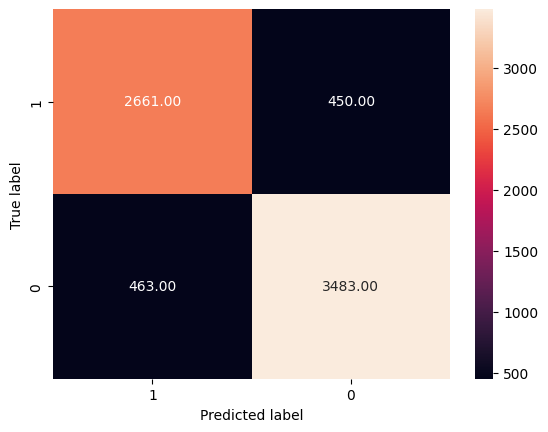

In [326]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [329]:
cr=pd.DataFrame(data=cm,index=[0,1],columns=[0,1])
cr

,0,1
0,2661,450
1,463,3483


In [328]:
#Accuracy 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8706249114354542

In [332]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3111
           1       0.89      0.88      0.88      3946

    accuracy                           0.87      7057
   macro avg       0.87      0.87      0.87      7057
weighted avg       0.87      0.87      0.87      7057



In [333]:
from sklearn.tree import DecisionTreeClassifier
trees=DecisionTreeClassifier()
trees.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5919310421327867, 0.9852941176470589, 'X[18] <= 0.166\ngini = 0.494\nsamples = 21171\nvalue = [9390, 11781]'),
 Text(0.3580628075677448, 0.9558823529411765, 'X[19] <= 3.5\ngini = 0.231\nsamples = 12160\nvalue = [1618, 10542]'),
 Text(0.35699867707874355, 0.9264705882352942, 'X[19] <= 1.5\ngini = 0.152\nsamples = 11491\nvalue = [949, 10542]'),
 Text(0.1330173746710964, 0.8970588235294118, 'X[17] <= -1.811\ngini = 0.06\nsamples = 8349\nvalue = [259, 8090]'),
 Text(0.0021282609780024276, 0.8676470588235294, 'X[18] <= -1.548\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.0010641304890012138, 0.8382352941176471, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.003192391467003641, 0.8382352941176471, 'X[21] <= 5.0\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.0021282609780024276, 0.8088235294117647, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.004256521956004855, 0.8088235294117647, 'X[15] <= -0.375\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.

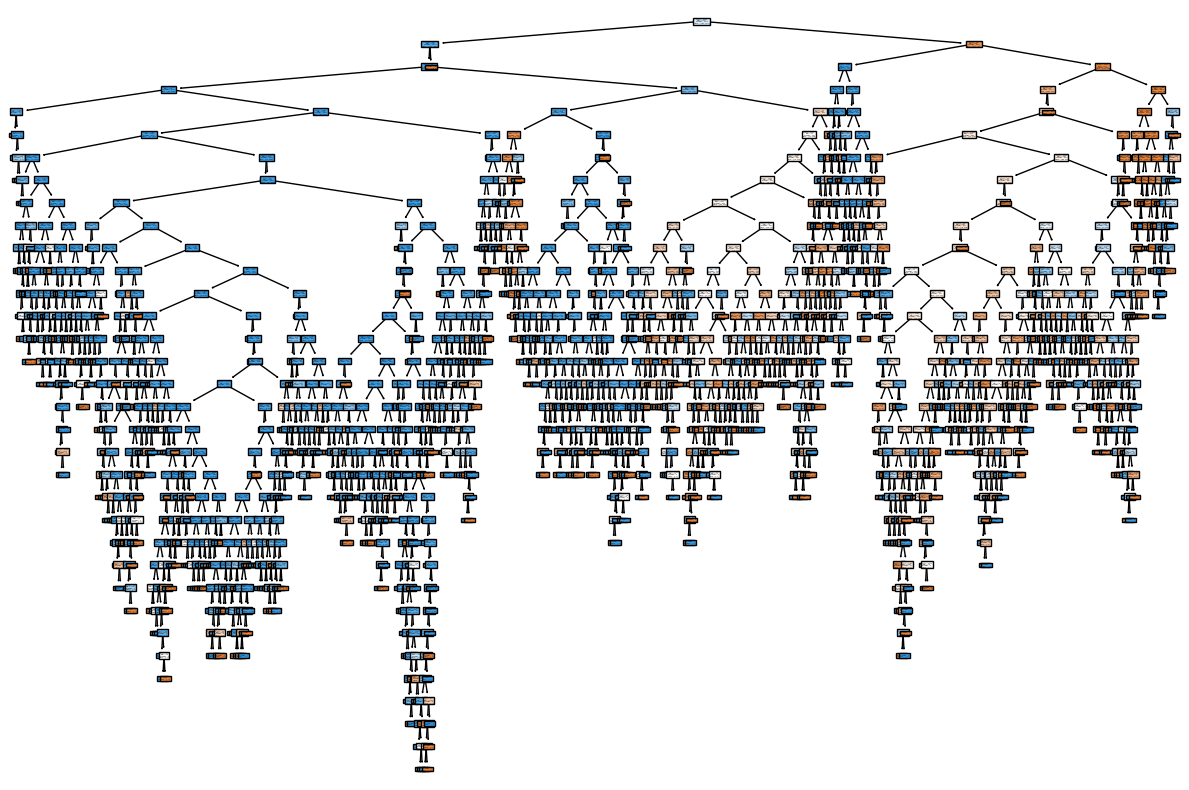

In [334]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(trees,filled=True)

In [335]:
y_pred=trees.predict(X_test)

In [336]:
acc=accuracy_score(y_test,y_pred)
acc                       #without max depth 

0.9104435312455718

In [337]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

,0,1
0,2816,295
1,337,3609


In [378]:
#selecting important features using randomforest

In [352]:
model =  RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

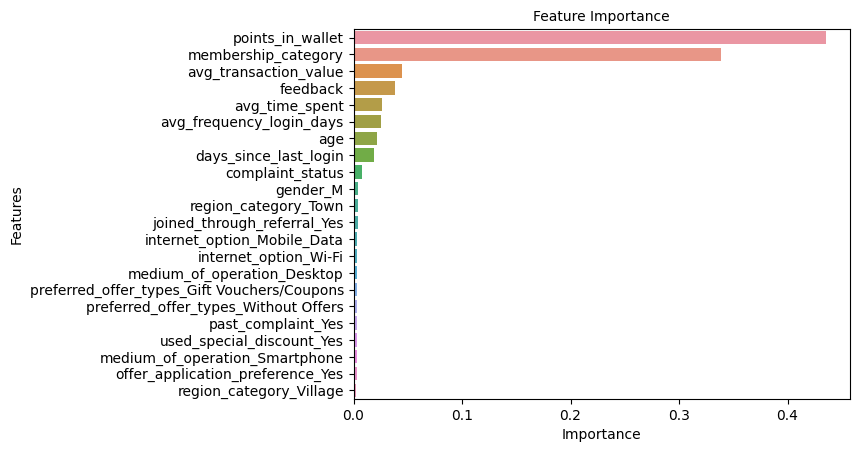

In [355]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 10)
plt.xlabel('Importance', fontsize = 10)
plt.ylabel('Features', fontsize = 10)

plt.show()

In [360]:
#dropping less important columns
X.drop(columns=['gender_M', 'region_category_Town', 'region_category_Village',
       'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'used_special_discount_Yes',
       'offer_application_preference_Yes', 'past_complaint_Yes'],inplace=True)

In [361]:
X.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'membership_category', 'complaint_status', 'feedback'],
      dtype='object')

In [363]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [364]:
lg.fit(X_train,y_train)

LogisticRegression()

In [365]:
y_pred=lg.predict(X_test) 

In [367]:
acc=accuracy_score(y_test,y_pred)
acc             #not much difference

0.8724670539889472

In [370]:
#lets check with decision tree

In [371]:
trees=DecisionTreeClassifier()
trees.fit(X_train,y_train)
y_pred=trees.predict(X_test)

In [372]:
acc=accuracy_score(y_test,y_pred)
acc        

0.9166784752727788

In [ ]:
#with max depth

In [390]:
trees=DecisionTreeClassifier(max_depth=6)
trees.fit(X_train,y_train)
y_pred=trees.predict(X_test)

In [394]:
from sklearn import tree
plt.figure(figsize=(150,100))
tree.plot_tree(trees,filled=True)

[Text(0.4517857142857143, 0.9285714285714286, 'X[5] <= 0.166\ngini = 0.494\nsamples = 21171\nvalue = [9390, 11781]'),
 Text(0.20357142857142857, 0.7857142857142857, 'X[6] <= 3.5\ngini = 0.231\nsamples = 12160\nvalue = [1618, 10542]'),
 Text(0.18928571428571428, 0.6428571428571429, 'X[6] <= 1.5\ngini = 0.152\nsamples = 11491\nvalue = [949, 10542]'),
 Text(0.07857142857142857, 0.5, 'X[4] <= -1.811\ngini = 0.06\nsamples = 8349\nvalue = [259, 8090]'),
 Text(0.02857142857142857, 0.35714285714285715, 'X[5] <= -1.548\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.014285714285714285, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.04285714285714286, 0.21428571428571427, 'X[8] <= 5.0\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.02857142857142857, 0.07142857142857142, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.05714285714285714, 0.07142857142857142, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.12857142857142856, 0.35714285714285715

In [392]:
acc=accuracy_score(y_test,y_pred)
acc        #not able to visulaize the pure split clearly, so not considering this one

0.9409097350148788

### now with Knn

In [379]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [380]:
#Accuracy 

accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9047754003117472

In [381]:
cr=pd.DataFrame(data=confusion_matrix(y_test.values,y_pred),index=[0,1],columns=[0,1])
cr

,0,1
0,2829,282
1,306,3640


In [383]:
#elbow method

error=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    error.append(np.mean(y_predict!=y_test))

Text(0, 0.5, 'error')

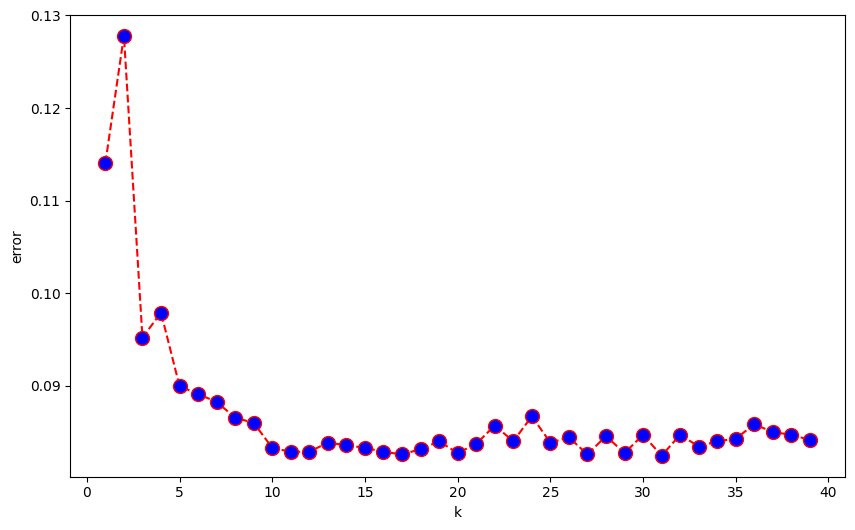

In [384]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='r',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('k')
plt.ylabel('error')


In [ ]:
#lets try with k=12,k=13

In [385]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [386]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9171035850928156

In [387]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)

In [388]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.9161116621793963

# cross Validation

In [368]:
#K-fold

from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)

scores = cross_val_score(lg, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8790294  0.8854056  0.86627701 0.86979628 0.87989371]
Average CV Score:  0.8760803999288397
Number of CV Scores used in Average:  5


In [369]:
#K-fold

from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)

scores = cross_val_score(trees, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.91657811 0.92136026 0.91781792 0.91532329 0.91674048]
Average CV Score:  0.917564012177586
Number of CV Scores used in Average:  5


In [382]:
#K-fold

from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)

scores = cross_val_score(knn, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.90913921 0.90843075 0.90400283 0.91018601 0.91107174]
Average CV Score:  0.9085661090240957
Number of CV Scores used in Average:  5


In [ ]:
Decision tree: 91.6 accuracy without max depth
Logistic : 87 acc
Knn : 91.7 (k=12)